# Graph Visualization Notebook
This notebook is used to visualize the graph instances, and to test reading graph instances from the files.

In [1]:
import os
import sys
current_directory = os.getcwd().replace('notebooks', '')
sys.path.append(current_directory)

from matplotlib import pyplot as plt
import networkx as nx

from utils.graph_plotter import plot_graph
from utils.graph_reader import read_graph_instance, read_rakaj_graph_instance
from main.greedy_algorithm import greedy_mwds, greedy_mwdds
from main.ilp_model import ilp_mwdds

import warnings
warnings.filterwarnings('ignore')

In [2]:
dim_path = "../instances/test_instances/"
instances = os.listdir(os.path.abspath(dim_path))

In [3]:
def plot_graph_grid(vertices_w: dict, edges: list, dominating_set: set=None, instance_info: str="", digraph: bool = False, ax=None):
    if ax is None:
        plt.figure(figsize=(10, 8))
    else:
        plt.sca(ax)
    
    if digraph:
        graph = nx.DiGraph(edges)
        edges_options = {"arrows": True, "arrowstyle": "->", "arrowsize": 15, "node_size": 1500}
    else:
        graph = nx.Graph(edges)
        edges_options = {"arrows": True, "node_size": 1500}

    pos = nx.nx_pydot.graphviz_layout(graph, prog="neato")
    color_map = []

    for node in graph.nodes:
        if not dominating_set:
            color_map.append('blue')
        else:
            if node in dominating_set:
                color_map.append('red')
            else:
                color_map.append('blue')

        graph.nodes[node]["weight"] = vertices_w[node]

    nodes_options = {"edgecolors": "tab:gray", "node_size": 1500, "alpha": 0.8}
    nx.draw_networkx_nodes(graph, pos, node_color=color_map, **nodes_options)
    nx.draw_networkx_edges(graph, pos, edgelist=edges, width=2, **edges_options)

    labels = {
        n: str(n) + '\nw' + str(graph.nodes[n]['weight'])
        for n in graph.nodes
    }
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=14, font_color='white')


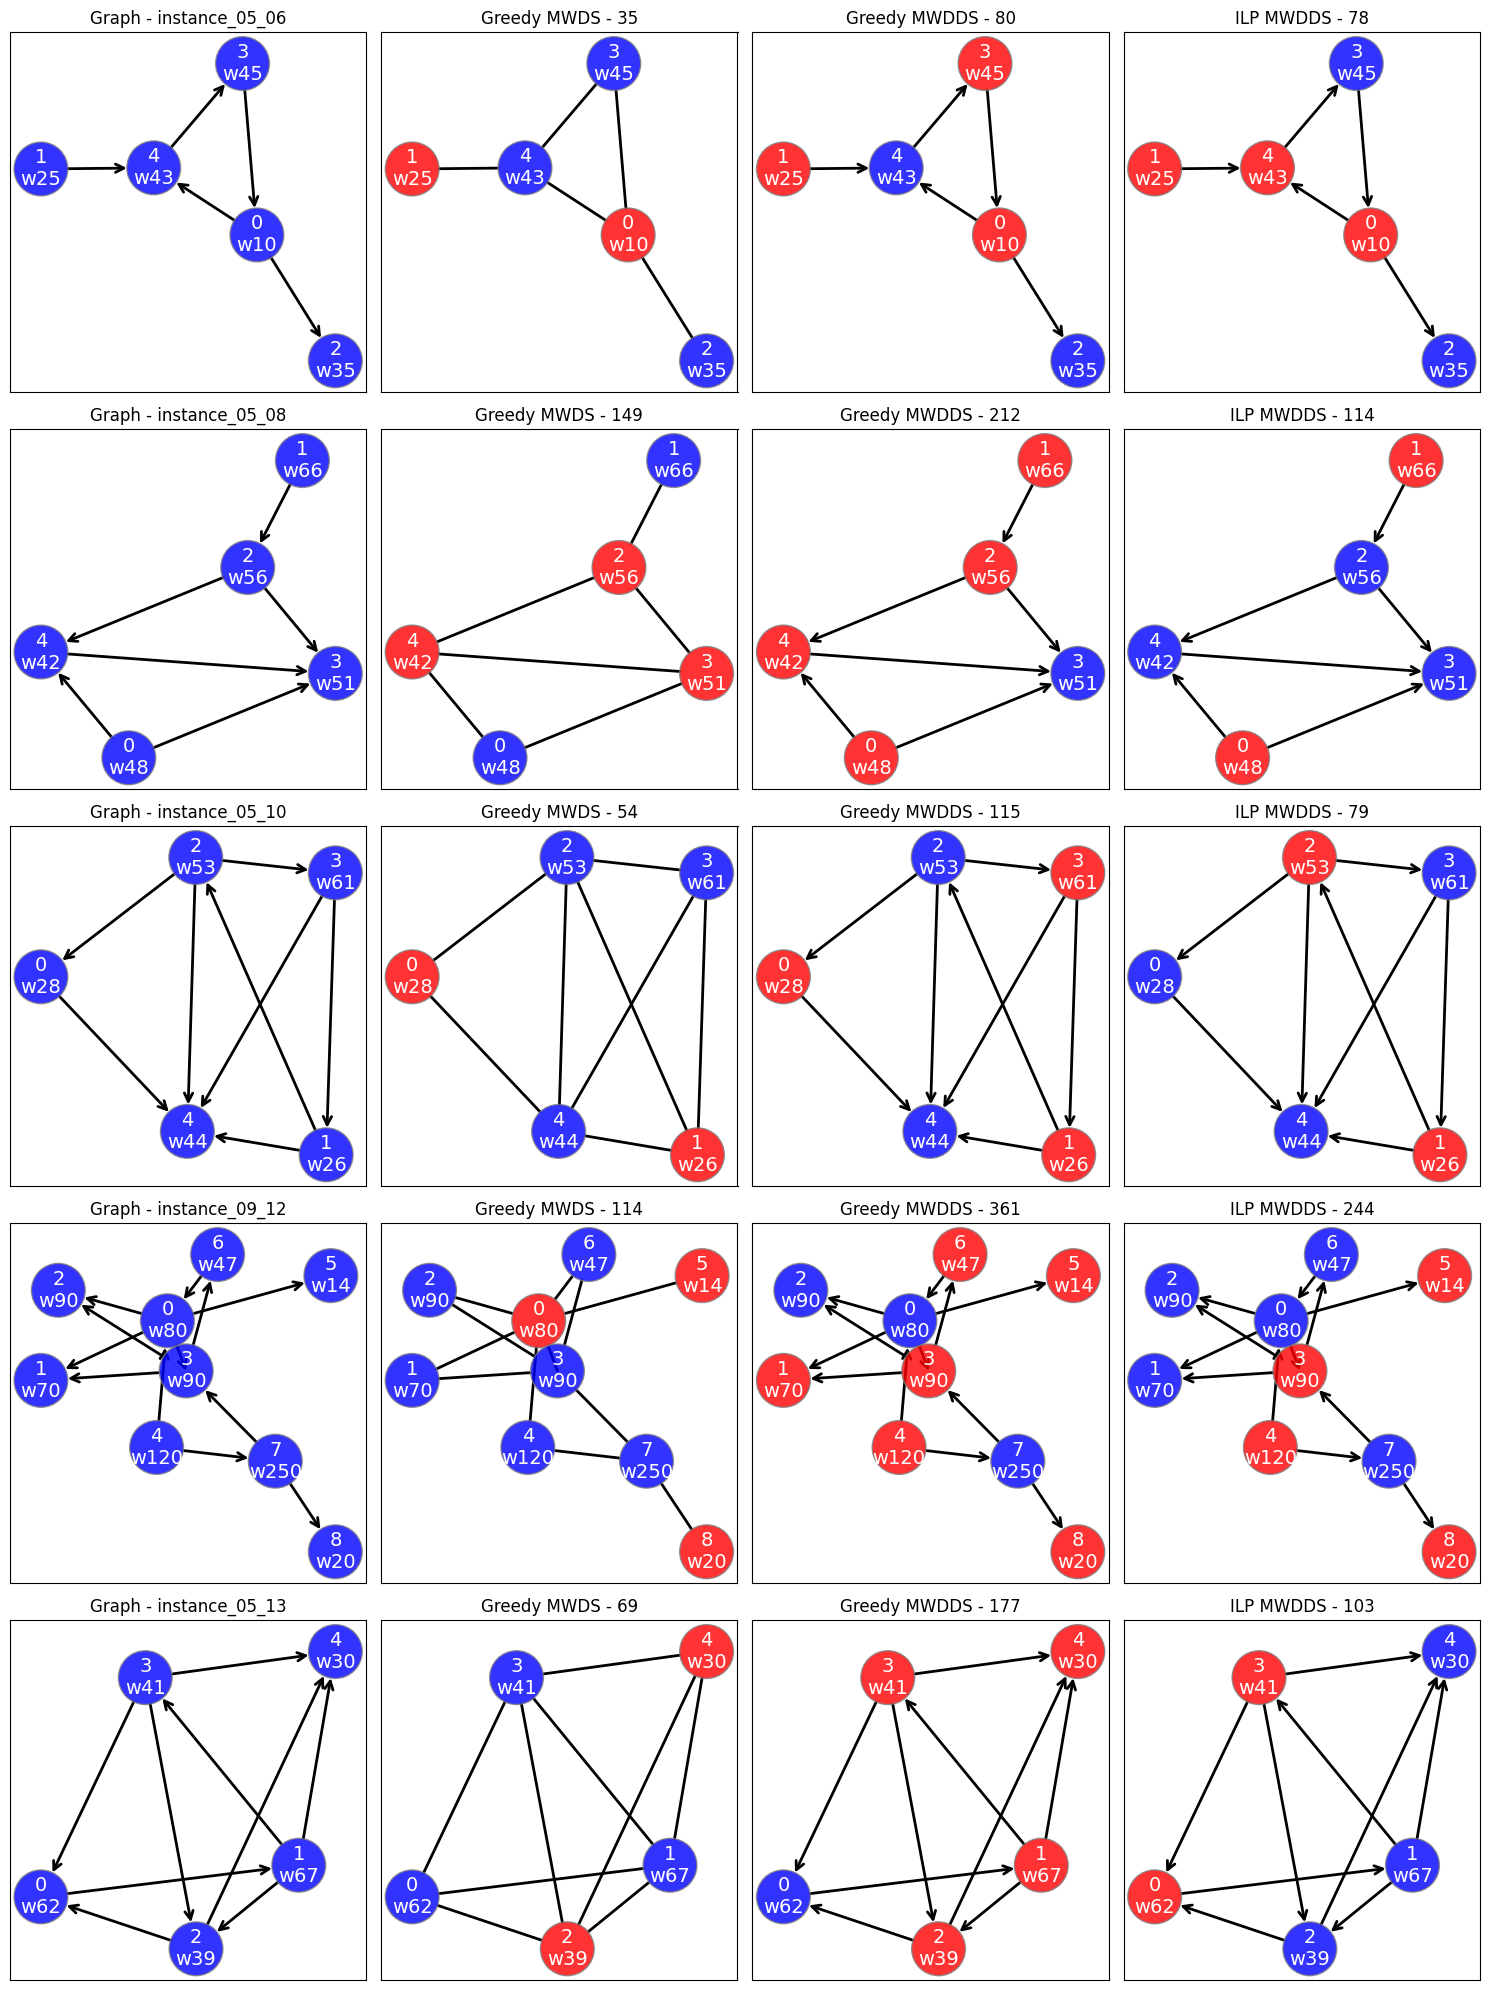

In [4]:
num_rows = len(instances)
num_cols = 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

for i, instance in enumerate(instances):
    instance_path = os.path.join(dim_path, instance)
    graph_v, graph_e = read_graph_instance(instance_path)

    axs[i, 0].set_title("Graph - " + instance.replace(".txt", ""))
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, digraph=True, ax=axs[i, 0])

    # Plot the minimum weight dominating set
    ds, ds_w = greedy_mwds(graph_v, graph_e)
    axs[i, 1].set_title("Greedy MWDS - " + str(ds_w))
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=ds, digraph=False, ax=axs[i, 1])

    # Plot the minimum weight directed dominating set
    ds, ds_w = greedy_mwdds(graph_v, graph_e)
    axs[i, 2].set_title("Greedy MWDDS - " + str(ds_w))
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=ds, digraph=True, ax=axs[i, 2])

    # Plot ILP solver solution
    ds, ds_w = ilp_mwdds(graph_v, graph_e)
    axs[i, 3].set_title("ILP MWDDS - " + str(ds_w))
    plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=ds, digraph=True, ax=axs[i, 3])

plt.tight_layout()
plt.show()
fig.savefig("test_instances_overview_en.png")

### Rakaj instances - testing function for reading data from file

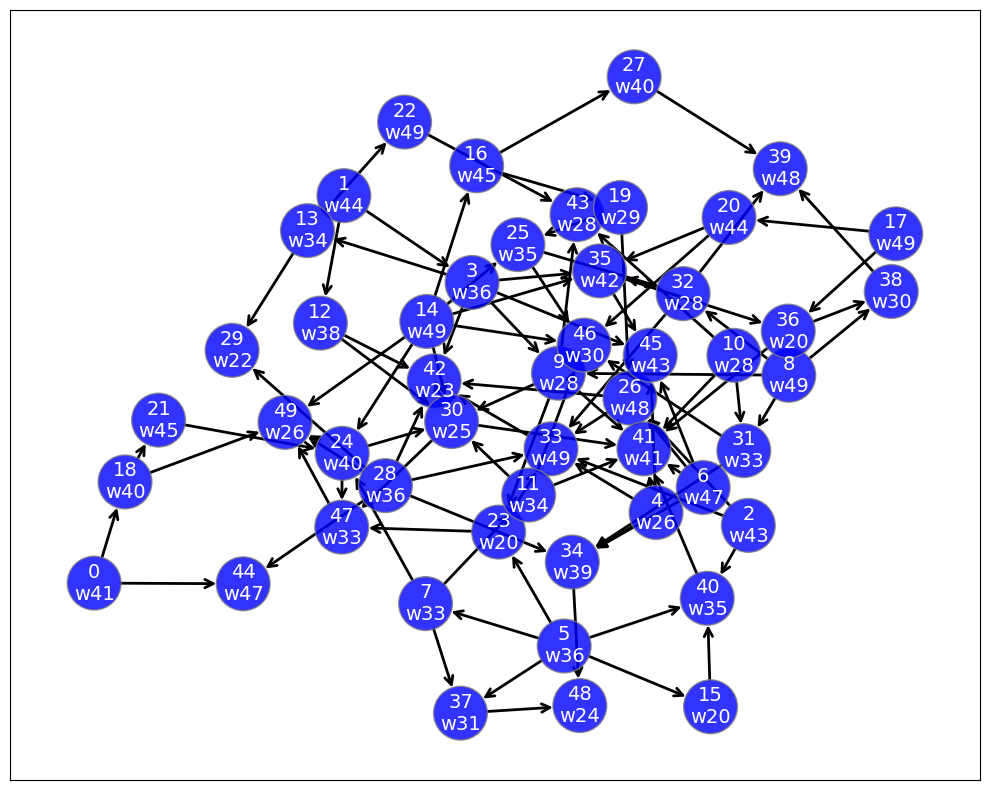

MWDS solution:  {3, 4, 6, 7, 9, 10, 14, 15, 18, 19, 23, 24, 27, 28, 29, 30, 31, 32, 35, 36, 38, 40, 42, 43, 46, 48, 49} 838


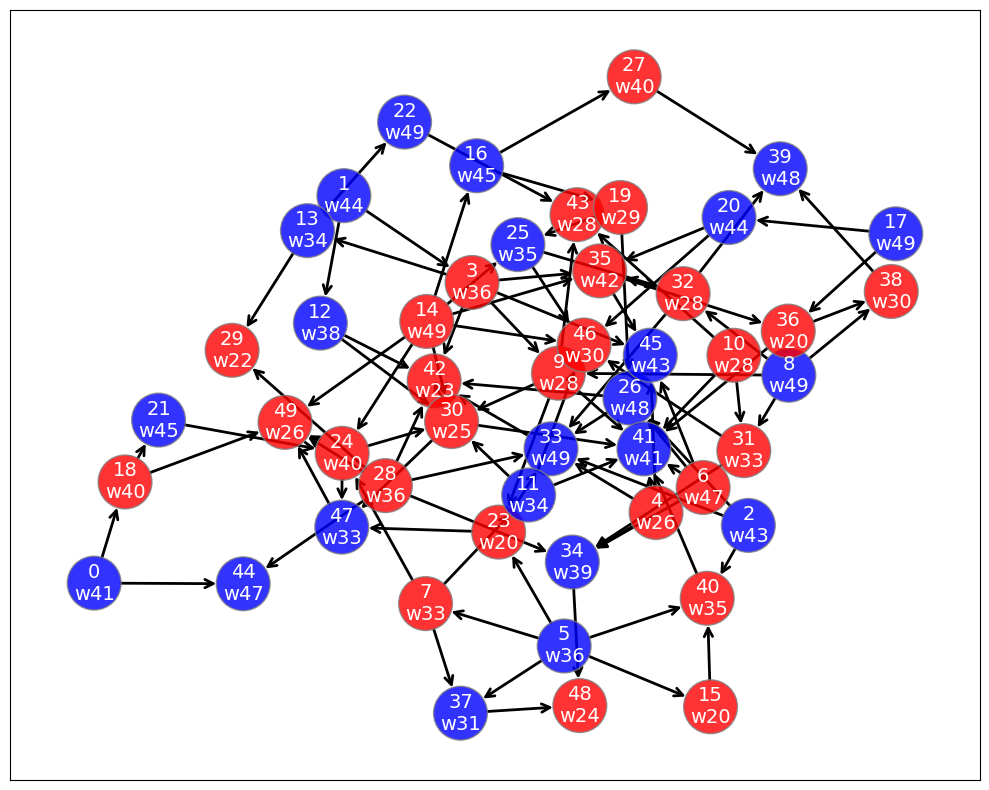

MWDDS solution:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 27, 28, 29, 30, 32, 36, 37, 42, 46, 48, 49} 1084


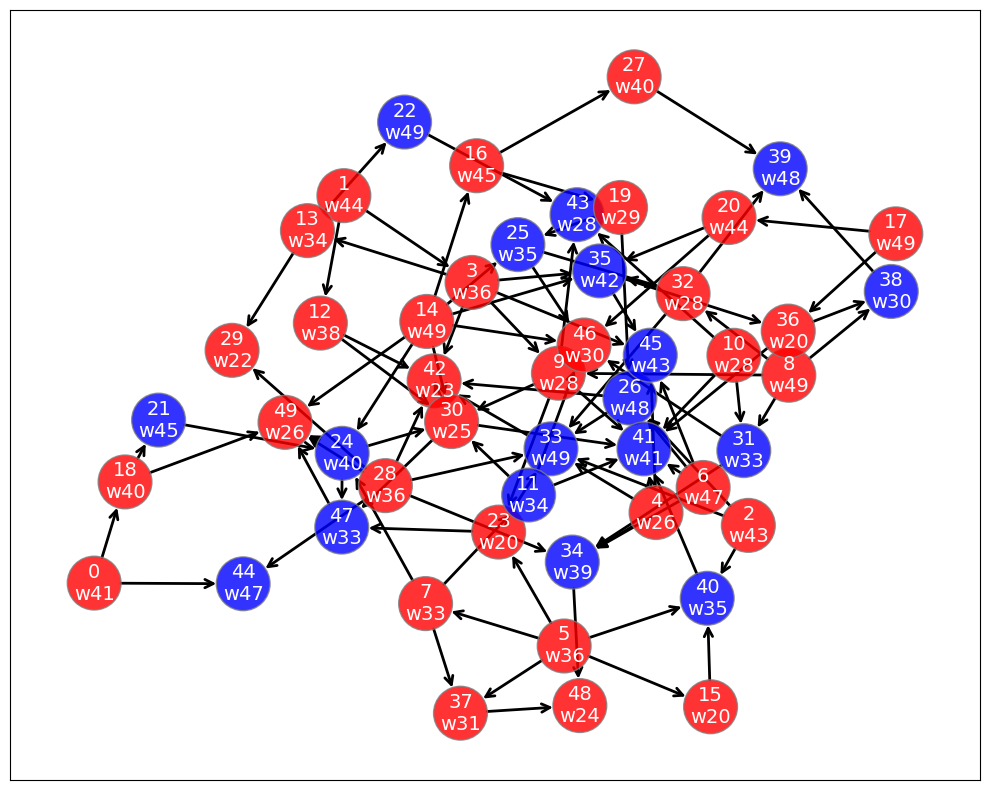

ILP solution:  {0, 1, 2, 4, 5, 6, 7, 8, 10, 13, 14, 48, 17, 18, 19, 23, 27, 28} 668


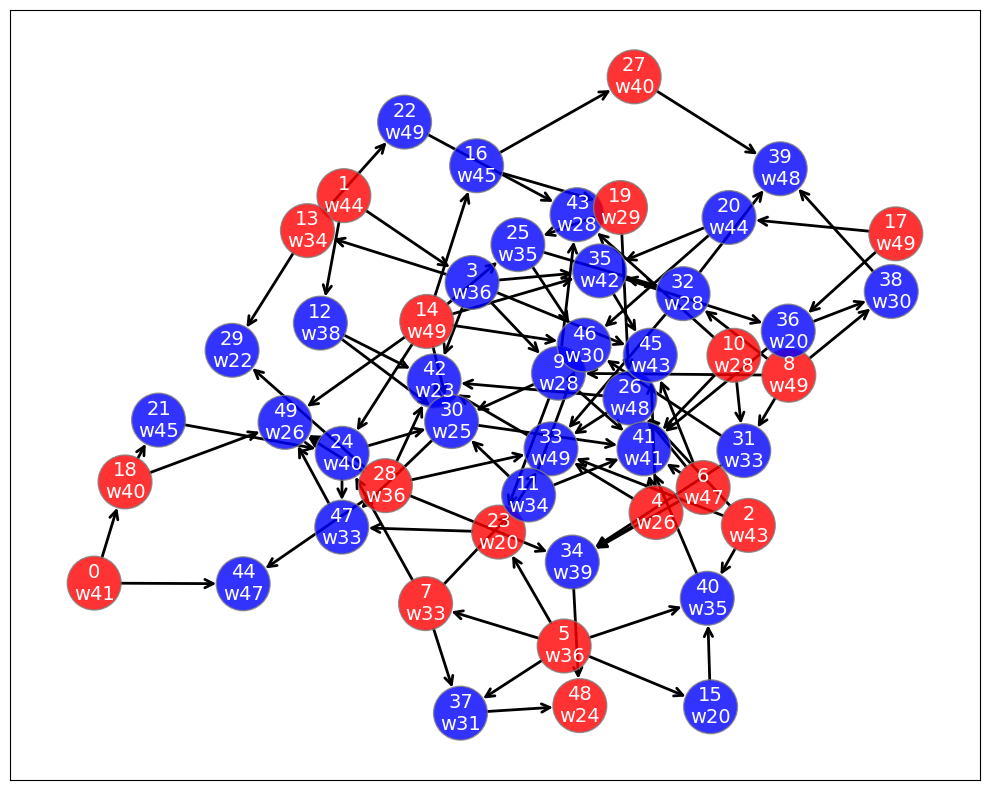

In [5]:
graph_v, graph_e = read_rakaj_graph_instance("../instances/small/V50E100/0/Test/Problem.dat_50_100_0")
plot_graph(vertices_w=graph_v, edges=graph_e, digraph=True)

ds, ds_w = greedy_mwds(graph_v, graph_e)
print("MWDS solution: ", ds, ds_w)
plot_graph(vertices_w=graph_v, edges=graph_e, dominating_set=ds, digraph=True)

ds, ds_w = greedy_mwdds(graph_v, graph_e)
print("MWDDS solution: ", ds, ds_w)
plot_graph(vertices_w=graph_v, edges=graph_e, dominating_set=ds, digraph=True)

ds, ds_w = ilp_mwdds(graph_v, graph_e)
print("ILP solution: ", ds, ds_w)
plot_graph(vertices_w=graph_v, edges=graph_e, dominating_set=ds, digraph=True)

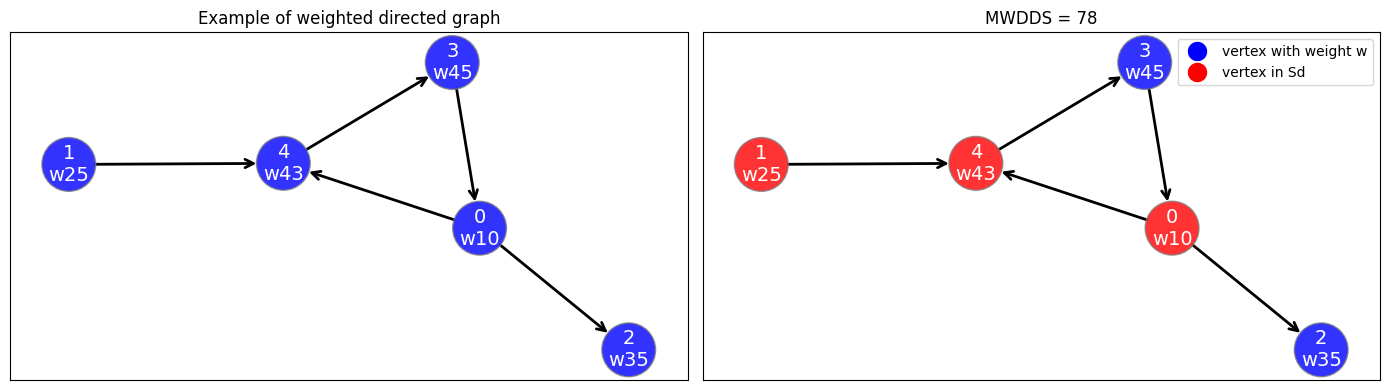

In [6]:
from matplotlib.lines import Line2D

num_rows = 1
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 2 * 2))

graph_v, graph_e = read_graph_instance("../instances/test_instances/instance_05_06.txt")

axs[0].set_title("Example of weighted directed graph")
plot_graph_grid(vertices_w=graph_v, edges=graph_e, digraph=True, ax=axs[0])

ds, ds_w = ilp_mwdds(graph_v, graph_e)
axs[1].set_title("MWDDS = " + str(ds_w))
plot_graph_grid(vertices_w=graph_v, edges=graph_e, dominating_set=ds, digraph=True, ax=axs[1])
plt.legend(["blue", "orange"], loc=0)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='vertex with weight w',markerfacecolor='b', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='vertex in Sd',markerfacecolor='r', markersize=15),        
]
plt.legend(handles=legend_elements, loc='upper right')


plt.tight_layout()
plt.show()
# fig.savefig("../instances/images/instance_05_06_graph_en.png")

In [3]:
import polars as pl
from matplotlib import pyplot as plt

# read csv results
df_test = pl.read_csv("../results/res_test_instances.csv")
df_small = pl.read_csv("../results/res_small_instances.csv")
df_medium = pl.read_csv("../results/res_medium_instances.csv")
df_large = pl.read_csv("../results/res_large_instances.csv")

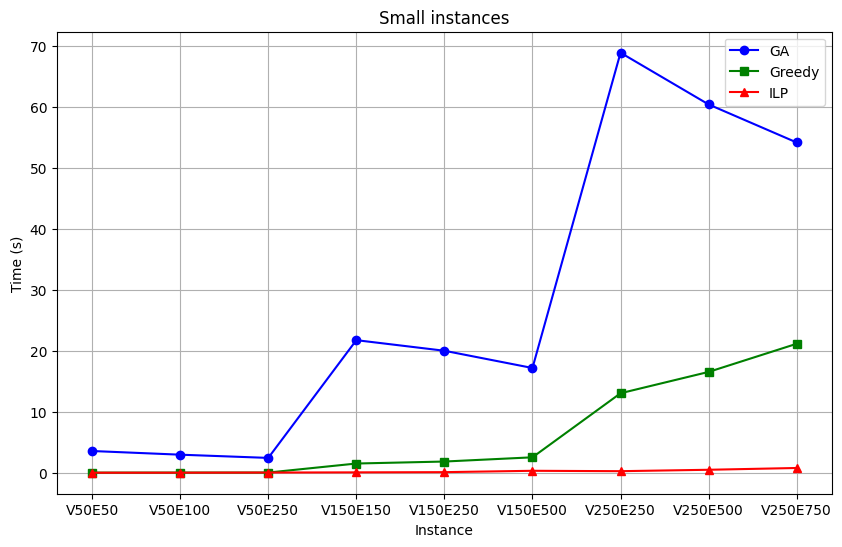

In [15]:
ga_color = 'blue'
greedy_color = 'green'
ilp_color = 'red'

instance_index = 0

# Create a new figure
fig = plt.figure(figsize=(10, 6))
plt.title(f'Small instances')
plt.xlabel('Instance')
plt.ylabel('Time (s)')

plt.plot(
    df_small['instance'], df_small['ga_time'], label='GA', color=ga_color, marker='o', linestyle='-'
)
plt.plot(
    df_small['instance'], df_small['greedy_time'], label='Greedy', color=greedy_color, marker='s', linestyle='-'
)
plt.plot(
    df_small['instance'], df_small['ilp_time'], label='ILP', color=ilp_color, marker='^', linestyle='-'
)

plt.legend()
plt.grid(True)
plt.show()
fig.savefig("../results/images/time_comparison_small_instances.png")

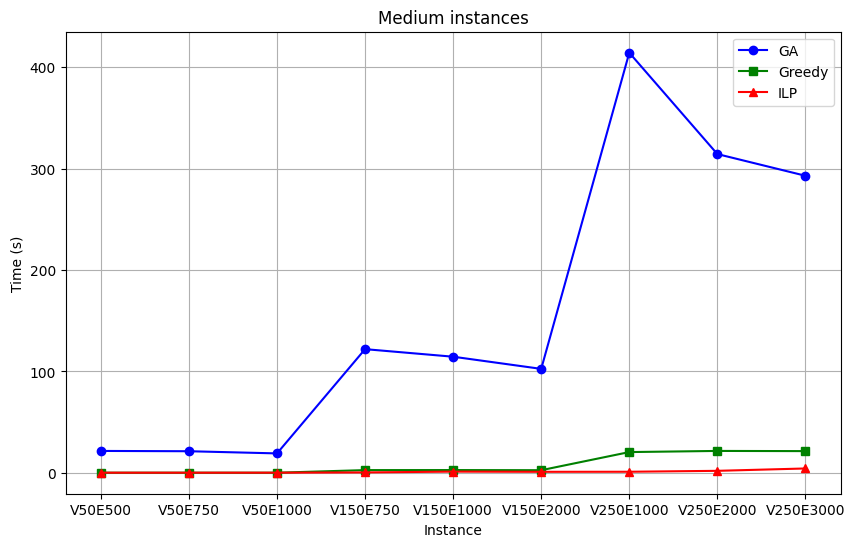

In [16]:
ga_color = 'blue'
greedy_color = 'green'
ilp_color = 'red'

instance_index = 0

# Create a new figure
fig = plt.figure(figsize=(10, 6))
plt.title(f'Medium instances')
plt.xlabel('Instance')
plt.ylabel('Time (s)')

plt.plot(
    df_medium['instance'], df_medium['ga_time'], label='GA', color=ga_color, marker='o', linestyle='-'
)
plt.plot(
    df_medium['instance'], df_medium['greedy_time'], label='Greedy', color=greedy_color, marker='s', linestyle='-'
)
plt.plot(
    df_medium['instance'], df_medium['ilp_time'], label='ILP', color=ilp_color, marker='^', linestyle='-'
)

plt.legend()
plt.grid(True)
plt.show()
fig.savefig("../results/images/time_comparison_medium_instances.png")

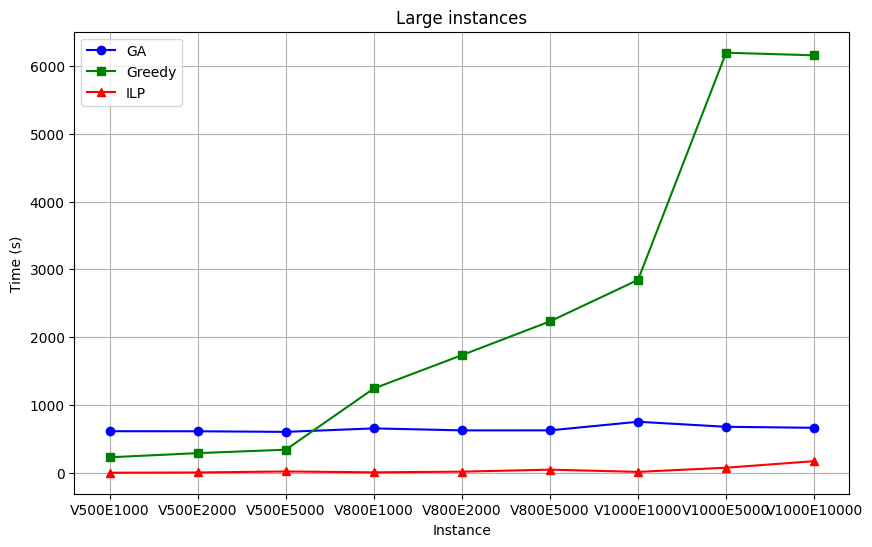

In [17]:
ga_color = 'blue'
greedy_color = 'green'
ilp_color = 'red'

instance_index = 0

# Create a new figure
fig = plt.figure(figsize=(10, 6))
plt.title(f'Large instances')
plt.xlabel('Instance')
plt.ylabel('Time (s)')

plt.plot(
    df_large['instance'], df_large['ga_time'], label='GA', color=ga_color, marker='o', linestyle='-'
)
plt.plot(
    df_large['instance'], df_large['greedy_time'], label='Greedy', color=greedy_color, marker='s', linestyle='-'
)
plt.plot(
    df_large['instance'], df_large['ilp_time'], label='ILP', color=ilp_color, marker='^', linestyle='-'
)

plt.legend()
plt.grid(True)
plt.show()
fig.savefig("../results/images/time_comparison_large_instances.png")